In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
PATH_LOAD = "Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv"
df = pd.read_csv(PATH_LOAD)

### Understand the Data - Overall

In [13]:
# How many vehicles this spreadsheet has recorded
print('This spreadsheet contains', len(df.groupby(['Vehicle_ID'])), 'vehicles in total.')

# Filter out motorbike and truck
dfCar = df[df['v_Class'] == 2]

# How many cars this spreadsheet has recorded
print('This spreadsheet contains', len(dfCar.groupby(['Vehicle_ID'])), 'cars.')

# What is the max/min number of records for a single car
print('Max number of records for a single car is:')
print(dfCar.groupby(['Vehicle_ID']).size().max())
print('Min number of records for a single car is:')
print(dfCar.groupby(['Vehicle_ID']).size().min())

This spreadsheet contains 3233 vehicles in total.
This spreadsheet contains 3216 cars.
Max number of records for a single car is:
9834
Min number of records for a single car is:
264


In [19]:
# How many roads this spreadsheet havs recorded
locationSeries = dfCar['Location']
locationList = []
for item in locationSeries:
    if item not in locationList:
        locationList.append(item)
        
print('This spreadsheet contains', len(dfCar.groupby(['Location'])), 'roads. They are:')        
print(locationList)

This spreadsheet contains 4 roads. They are:
['us-101', 'lankershim', 'peachtree', 'i-80']


In [20]:
# How many cars this spreadsheet have recorded for each road
df101 = dfCar[dfCar['Location'] == locationList[0]]
print('There are', len(df101.groupby(['Vehicle_ID']).size()), 'cars at ' + locationList[0] + ' .')

dfLan = dfCar[dfCar['Location'] == locationList[1]]
print('There are', len(dfLan.groupby(['Vehicle_ID']).size()), 'cars at ' + locationList[1] + ' .')

dfPea = dfCar[dfCar['Location'] == locationList[2]]
print('There are', len(dfPea.groupby(['Vehicle_ID']).size()), 'cars at ' + locationList[2] + ' .')

df80 = dfCar[dfCar['Location'] == locationList[3]]
print('There are', len(df80.groupby(['Vehicle_ID']).size()), 'cars at ' + locationList[3] + ' .')

There are 2830 cars at us-101 .
There are 1484 cars at lankershim .
There are 1531 cars at peachtree .
There are 2955 cars at i-80 .


In [25]:
# Directions and movements
print('There are', len(df101.groupby(['Direction'])), 'directions at ' + locationList[0] + ' .')
print('There are', len(df101.groupby(['Movement'])), 'movements at ' + locationList[0] + ' .\n')

print('There are', len(dfLan.groupby(['Direction'])), 'directions at ' + locationList[1] + ' .')
print('There are', len(dfLan.groupby(['Movement'])), 'movements at ' + locationList[1] + ' .\n')

print('There are', len(dfPea.groupby(['Direction'])), 'directions at ' + locationList[2] + ' .')
print('There are', len(dfPea.groupby(['Movement'])), 'movements at ' + locationList[2] + ' .\n')

print('There are', len(df80.groupby(['Direction'])), 'directions at ' + locationList[3] + ' .')
print('There are', len(df80.groupby(['Movement'])), 'movements at ' + locationList[3] + ' .\n')

There are 0 directions at us-101 .
There are 0 movements at us-101 .

There are 4 directions at lankershim .
There are 3 movements at lankershim .

There are 4 directions at peachtree .
There are 3 movements at peachtree .

There are 0 directions at i-80 .
There are 0 movements at i-80 .



### Understand the Data - us-101

In [28]:
df101.sort_values(by = ['Global_Time']) # We could tell that the number of cars is varied at different times

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
788,5,8,452,1118846979700,39.788,39.154,6451122.815,1873326.569,17.0,7.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101
789,5,9,452,1118846979800,39.767,43.153,6451125.503,1873323.608,17.0,7.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101
790,5,10,452,1118846979900,39.747,47.154,6451128.192,1873320.646,17.0,7.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101
791,5,11,452,1118846980000,39.726,51.154,6451130.881,1873317.684,17.0,7.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101
792,5,12,452,1118846980100,39.705,55.153,6451133.569,1873314.723,17.0,7.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101
793,5,13,452,1118846980200,39.685,59.154,6451136.258,1873311.761,17.0,7.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101
0,2,13,437,1118846980200,16.467,35.381,6451137.641,1873344.962,14.5,4.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101
1,2,14,437,1118846980300,16.447,39.381,6451140.329,1873342.000,14.5,4.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101
794,5,14,452,1118846980300,39.665,63.154,6451138.946,1873308.799,17.0,7.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101
2,2,15,437,1118846980400,16.426,43.381,6451143.018,1873339.038,14.5,4.9,...,NaN,NaN,NaN,NaN,NaN,0,0,0.00,0.00,us-101


In [31]:
# What is the max/min number of cars at the same time
maxNum = df101.groupby('Global_Time').size().max()
minNum = df101.groupby('Global_Time').size().min()

print('There are at most', maxNum, 'cars running on the road us-101 at the same time.')
print('There are at least', minNum, 'cars running on the road us-101 at the same time.')

There are at most 386 cars running on the road us-101 at the same time.
There are at least 1 cars running on the road us-101 at the same time.


In [33]:
# How long does these cars run together
timeAndCarNumber = df101.groupby('Global_Time').size()
timeListOfMaxNum = timeAndCarNumber[timeAndCarNumber == 386].index

print(maxNum, 'cars run at the same time for', len(timeListOfMaxNum)/10, 'seconds.' )

386 cars run at the same time for 0.5 seconds.


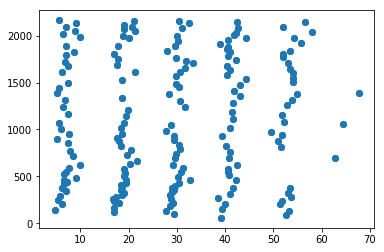

In [34]:
# Plot the situation when 386 cars run together

# Select the first frame
time0 = timeListOfMaxNum[0]

# Get the x, y coordinates of these cars
dfTime0 = df101[df101['Global_Time'] == time0]
carLocList = [[x, y] for x, y in zip(dfTime0.loc[:, 'Local_X'], dfTime0.loc[:, 'Local_Y'])]

# Plot the situation
plt.scatter(*zip(*carLocList))
plt.show()

In [35]:
# Define a fucntion to calculate the distance between two cars
def calDistance(carLoc1, carLoc2):
    x1 = carLoc1[0]
    y1 = carLoc1[1]
    x2 = carLoc2[0]
    y2 = carLoc2[1]
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [39]:
# Find the largest distance between two cars at this moment
maxDistance = 0
for i in range(maxNum - 1):
    for j in range(i + 1, maxNum):
        dis = calDistance(carLocList[i], carLocList[j])
        if dis > maxDistance:
            maxDistance = dis
            
print('The largest distance between two cars at this moment is %.2f feets.' %maxDistance)

The largest distance between two cars at this moment is 2109.31 feets.


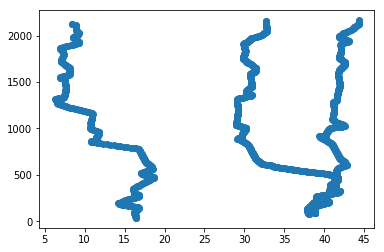

In [40]:
# Visualize the car's track (ID = 2)
dfID2 = df101[df101['Vehicle_ID'] == 2]
CarTrack2 = [[x, y] for x, y in zip(dfID2.loc[:, 'Local_X'], dfID2.loc[:, 'Local_Y'])]

plt.scatter(*zip(*CarTrack2))
plt.show()